In [1]:
from glotaran_tools.specification_parser import parse_yml
from glotaran_core.model import Dataset
from glotaran_models.kinetic import KineticSeparableModel
import numpy as np
from lmfit import Parameters
# Imports for plotting

import matplotlib.pyplot as plt
%matplotlib notebook

fitspec = '''
type: kinetic

parameter: {}

compartments: [s1, s2, s3]

megacomplexes:
    - label: mc1
      k_matrices: [k1]

k_matrices:
  - label: "k1"
    matrix: {{
      '("s1","s1")': 1,
      '("s2","s2")': 2,
      '("s3","s3")': 3,
}}

initial_concentrations: []

irf: []

datasets: 
  - label: dataset1
    type: spectral
    megacomplexes: [mc1]
    path: 'data/dataset1.ascii'

'''

In [2]:
test_parameter = [101e-4, 202e-5, 505e-6]
test_amps = [1,2,3]
times = np.asarray(np.arange(0, 1500, 1.5))
simparams = Parameters()
simparams.add("p1", 101e-3)
simparams.add("p2",202e-4)
simparams.add("p3",505e-5)

In [3]:
model = parse_yml(fitspec.format(test_parameter))

In [4]:
fitmodel = KineticSeparableModel(model)

/usr/lib64/python3.5/site-packages/pyopencl-2016.2-py3.5-linux-x86_64.egg/pyopencl/cffi_cl.py:1469: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  "to see more.", CompilerWarning)


(1000, 1)


<IPython.core.display.Javascript object>


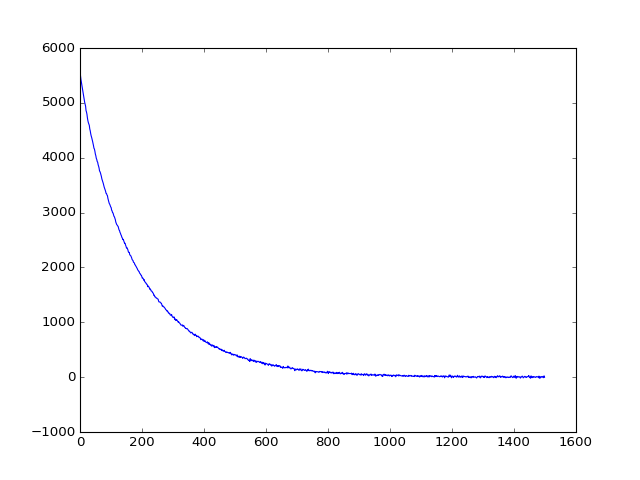

In [6]:
data = fitmodel.eval(simparams, *times, **{'dataset':'dataset1', 
                                           'noise':True, 'noise_std_dev':10,
                                                                                      'dataset1_x': [0],

                                           'amplitudes':[50, 500, 5000]})

fig = plt.figure()
plt.plot(times, data[:, 0])

In [8]:
result = fitmodel.fit(fitmodel.get_initial_fitting_parameter(), 
                      *times, 
                      **{"dataset1": data}
                     )
result.best_fit_parameter.pretty_print()
fitted_data = fitmodel.eval(result.best_fit_parameter, *times, **{'dataset':'dataset1','amplitudes':[50, 500, 5000]})
reconstructed_data = result.eval(*times, **{"data": data})
print('Fitted Amplitudes: {}'.format(result.e_matrix(*times, **{"data": data})))

fig = plt.figure()
plt.plot(times, data[:, 0])
plt.plot(times, fitted_data[:, 0])
plt.plot(times, reconstructed_data[:, 0])

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         4.6227e+06                                    3.84e+03    
       1              2         4.6227e+06      2.64e-05       3.16e-08       3.84e+03    
`ftol` termination condition is satisfied.
Function evaluations 2, initial cost 4.6227e+06, final cost 4.6227e+06, first-order optimality 3.84e+03.
Name     Value      Min      Max   Stderr     Vary     Expr
p1    0.0101     -inf      inf     None     True     None
p2   0.00202     -inf      inf     None     True     None
p3  0.000505     -inf      inf     None     True     None


KeyError: 'dataset1'